In [1]:
import cv2
import matplotlib.pyplot as plt

# Load two images
img1 = cv2.imread('stock-photo.jpg')[:,:,::-1]
img2 = cv2.imread('watermark-01.png')
img2 = cv2.resize(img2, (0,0), fx=0.25, fy=0.25)[:,:,::-1]
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

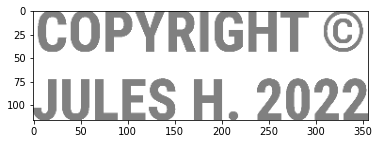

In [11]:
plt.imshow(img2_fg)